In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Load the data

In [2]:
#Make sure to adjust filepath if necessary

filepath = 'morning-warmups/data/data1.tsv'

In [3]:
df = pd.read_csv(filepath, delimiter='\t')

In [4]:
df.head()

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
0,2068,F,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49.0,Michigan
1,2073,F,NaN,0,Married,True,Rented,True,3.0,40.0,Florida
2,2848,M,True,4500,Never Married,False,Rented,True,3.0,22.0,Georgia
3,5641,M,True,20000,Never Married,False,Occupied with no rent,False,0.0,22.0,New Mexico
4,6369,F,True,12000,Never Married,True,Rented,True,1.0,31.0,Florida


### Use pandas descriptive statistics functionality to find the quartiles, mean, median, mode, min, and max of the data

In [5]:
df.describe()

,custid,income,num.vehicles,age
count,1.000000e+03,1000.000000,944.000000,1000.000000
mean,6.984997e+05,53504.771000,1.916314,51.699815
std,4.135083e+05,65478.065729,1.101618,18.863433
min,2.068000e+03,-8700.000000,0.000000,0.000000
25%,3.456668e+05,14600.000000,1.000000,38.000000
50%,6.934030e+05,35000.000000,2.000000,50.000000
75%,1.044606e+06,67000.000000,2.000000,64.000000
max,1.414286e+06,615000.000000,6.000000,146.680197


In [6]:
df.drop('custid', axis=1).mode()

,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
0,M,True,0.0,Married,True,Homeowner with mortgage/loan,False,2.0,44.0,California
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN


### How many missing values does each column have?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   custid        1000 non-null   int64  
 1   sex           1000 non-null   object 
 2   is.employed   672 non-null    object 
 3   income        1000 non-null   int64  
 4   marital.stat  1000 non-null   object 
 5   health.ins    1000 non-null   bool   
 6   housing.type  944 non-null    object 
 7   recent.move   944 non-null    object 
 8   num.vehicles  944 non-null    float64
 9   age           1000 non-null   float64
 10  state.of.res  1000 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 79.2+ KB


In [8]:
df.isna().sum()

custid            0
sex               0
is.employed     328
income            0
marital.stat      0
health.ins        0
housing.type     56
recent.move      56
num.vehicles     56
age               0
state.of.res      0
dtype: int64

###  Are there any values that appear to be highly unlikely or impossible in a column?

In [9]:
df[['income', 'num.vehicles','age']].describe().apply(round)

,income,num.vehicles,age
count,1000.0,944.0,1000.0
mean,53505.0,2.0,52.0
std,65478.0,1.0,19.0
min,-8700.0,0.0,0.0
25%,14600.0,1.0,38.0
50%,35000.0,2.0,50.0
75%,67000.0,2.0,64.0
max,615000.0,6.0,147.0


In [10]:
df[df['income'] < 0]

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
691,971703,M,False,-8700,Married,True,Homeowner with mortgage/loan,False,3.0,60.0,Oklahoma


In [11]:
df[(df['age'] > 100) | (df['age'] == 0)]

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
212,287882,M,True,60000,Married,True,Rented,True,2.0,137.700030,Florida
266,364991,F,NaN,12000,Divorced/Separated,True,Homeowner with mortgage/loan,False,1.0,123.061023,Nevada
286,397230,F,True,31200,Married,True,Rented,False,2.0,136.052160,Texas
593,843811,F,True,40000,Never Married,True,Homeowner with mortgage/loan,False,1.0,146.680197,Indiana
625,875771,M,False,175200,Married,True,Homeowner with mortgage/loan,False,3.0,124.845087,Arkansas
667,931449,M,NaN,42400,Married,True,Homeowner free and clear,False,2.0,0.000000,Missouri
752,1047534,M,True,200000,Married,True,Homeowner with mortgage/loan,False,4.0,130.401605,Washington
868,1229417,F,True,48000,Married,True,Homeowner with mortgage/loan,False,3.0,0.000000,Washington
926,1303929,F,False,43400,Never Married,True,Rented,False,1.0,126.737284,West Virginia
953,1361012,F,NaN,255000,Widowed,True,Homeowner free and clear,False,1.0,113.337207,Tennessee


### (Checking categorical features for any anomalies)

In [12]:
df['sex'].value_counts()

M    560
F    440
Name: sex, dtype: int64

In [13]:
df['is.employed'].value_counts()

True     599
False     73
Name: is.employed, dtype: int64

In [14]:
df['marital.stat'].value_counts()

Married               516
Never Married         233
Divorced/Separated    155
Widowed                96
Name: marital.stat, dtype: int64

In [15]:
df['housing.type'].value_counts()

Homeowner with mortgage/loan    412
Rented                          364
Homeowner free and clear        157
Occupied with no rent            11
Name: housing.type, dtype: int64

In [16]:
df['recent.move'].value_counts()

False    820
True     124
Name: recent.move, dtype: int64

In [17]:
df['state.of.res'].nunique()

50

### Which columns have missing values that it is probably ok to drop/ignore?

In [18]:
df[df['housing.type'].isna()]

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
17,26057,M,True,30000,Married,True,NaN,NaN,NaN,28.0,Florida
55,68013,M,NaN,100,Divorced/Separated,False,NaN,NaN,NaN,28.0,California
72,90303,M,NaN,0,Never Married,False,NaN,NaN,NaN,45.0,Kentucky
96,115100,M,NaN,0,Never Married,False,NaN,NaN,NaN,29.0,California
123,151678,M,NaN,0,Never Married,False,NaN,NaN,NaN,34.0,Georgia
133,167154,M,NaN,0,Never Married,False,NaN,NaN,NaN,31.0,New Jersey
177,220142,F,NaN,0,Never Married,True,NaN,NaN,NaN,18.0,Arkansas
188,249492,F,NaN,10100,Widowed,True,NaN,NaN,NaN,93.0,Georgia
196,259807,M,NaN,440,Married,True,NaN,NaN,NaN,49.0,West Virginia
200,268667,M,NaN,200,Never Married,True,NaN,NaN,NaN,31.0,Pennsylvania


In [19]:
sum(df['housing.type'].isna())/len(df)

0.056

**The 56 missing values for housing type, recent move, and num vehicles are all from the same 56 rows. This accounts for only 5.6% of the total data. So far, seems like we can drop these rows. But maybe we should see what effect dropping these rows will have on our other features like age and income.**

In [20]:
missing_data = df[df['housing.type'].isna()]
full_data = df[~df['housing.type'].isna()]

In [21]:
print(f"Full data age mean: {full_data['age'].mean()}")
print(f"Incomplete data age mean: {missing_data['age'].mean()}")

Full data age mean: 51.93306630514108
Incomplete data age mean: 47.767857142857146


In [22]:
print(f"Full data income mean: {full_data['income'].mean()}")
print(f"Incomplete data income mean: {missing_data['income'].mean()}")

Full data income mean: 56310.59427966102
Incomplete data income mean: 6206.607142857143


In [23]:
stats.ttest_ind(full_data['age'], missing_data['age'])

Ttest_indResult(statistic=1.6067177139185345, pvalue=0.10843262762254528)

In [24]:
stats.ttest_ind(full_data['income'], missing_data['income'])

Ttest_indResult(statistic=5.649027224614636, pvalue=2.103873726702235e-08)

**The difference in incomes between these two groups is definitely statistically significant. This should prompt further consideration of how we might handle this data. Perhaps we might further investigate how this data was gathered/recorded to make a more informed decision**

### Which columns have values that you cannot (should not) ignore (because there might be too many)? Why might there be so many for this column(s)? Are there any missing/NA values that may not actually be missing but just represent a different value?

In [25]:
df['is.employed'].value_counts()

True     599
False     73
Name: is.employed, dtype: int64

In [26]:
df['is.employed'].isna().sum()

328

**Possible that NaN is a marker for "unknown". It may be tempting to look at the income feature and say that if a person a person has a non-zero income, they must be employed. But perhaps an unemployed person has unearned income recorded. We see a range of incomes listed for people marked as unemployed. It may be safest to make is.unemployed a categorical variable with "unknown" as a third category** 

### Exploring Outliers

In [27]:
df[df.income < 0]

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
691,971703,M,False,-8700,Married,True,Homeowner with mortgage/loan,False,3.0,60.0,Oklahoma


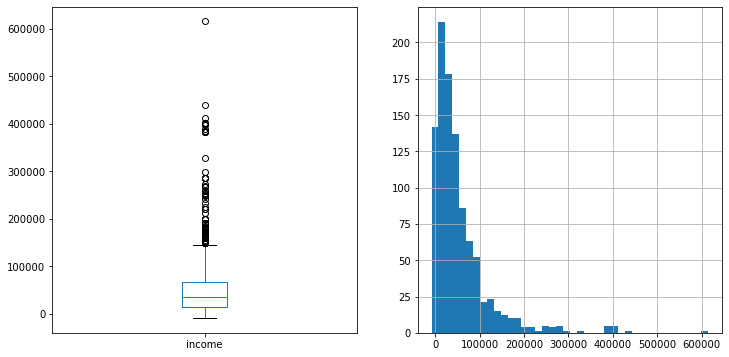

In [28]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
df['income'].plot(kind='box',ax=axs[0])
df['income'].hist(bins=40, ax=axs[1]);

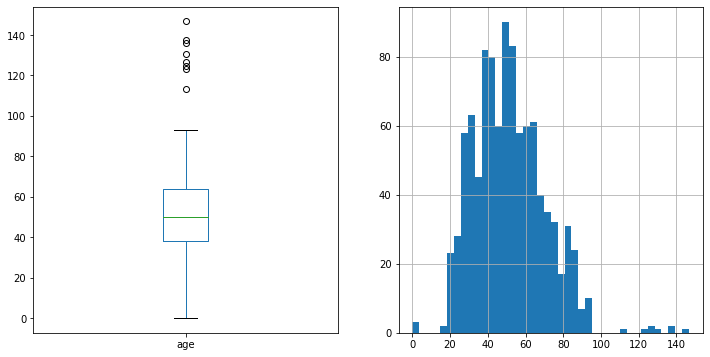

In [29]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
df['age'].plot(kind='box',ax=axs[0])
df['age'].hist(bins=40, ax=axs[1]);

### Combine the values from the summary statistics you computed earlier with your intuition to determine what values are outlier in each column. How many of these values are there?

In [30]:
(df['income'] < 0).sum()

1

In [31]:
((df['age'] > 100) | (df['age'] == 0)).sum()

11

### What are the ranges for each column? How do these compare to one another (i.e. is one way larger than the others)? And what units do you think each column is in?

In [32]:
# Before dealing with outliers
print(f"Max: \n{df[['income', 'num.vehicles', 'age']].max()}")
print()
print(f"Min: \n{df[['income', 'num.vehicles', 'age']].min()}")

Max: 
income          615000.000000
num.vehicles         6.000000
age                146.680197
dtype: float64

Min: 
income         -8700.0
num.vehicles       0.0
age                0.0
dtype: float64


In [33]:
# Accounting for outliers in age:
clean_df = df[~((df['age'] > 100) | (df['age'] == 0))]
print(f"Maximum age: {clean_df['age'].max()}")
print()
print(f"Minimum age: {clean_df['age'].min()}")

Maximum age: 93.0

Minimum age: 18.0


In [34]:
#Accounting for outliers in income:
clean_df = clean_df[clean_df['income'] >=0]
print(f"Maximum income: {clean_df['income'].max()}")
print()
print(f"Minimum income: {clean_df['income'].min()}")

Maximum income: 615000

Minimum income: 0


#### Visualization showing the difference in distributions of income between the observations with missing housing, move, and vehicle features and those not missing those features

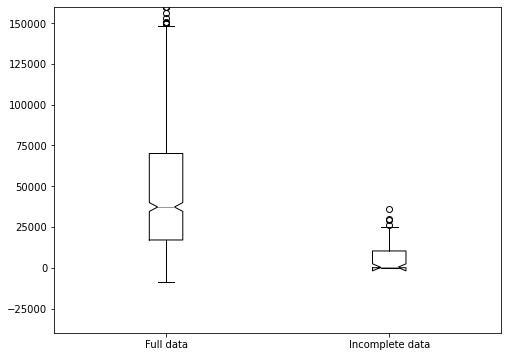

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
labels = ['Full data', 'Incomplete data']
ax.boxplot([full_data['income'].values, missing_data['income'].values], notch=True, vert=True, labels=labels)
ax.set_ylim(top=160000);